In [2]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("dataset.csv")

df['Date_ordinal'] = df['Date'].map(pd.to_datetime).map(pd.Timestamp.toordinal)

df.head()

,level_0,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date_ordinal
0,0,0,2020-05-06 00:00:00-04:00,1704.000000,1704.000000,1684.199951,1684.199951,469,0.0,0.0,737551
1,1,1,2020-05-07 00:00:00-04:00,1686.199951,1721.800049,1685.599976,1721.800049,853,0.0,0.0,737552
2,2,2,2020-05-08 00:00:00-04:00,1726.199951,1728.900024,1703.800049,1709.900024,330,0.0,0.0,737553
3,3,3,2020-05-11 00:00:00-04:00,1702.300049,1704.500000,1690.199951,1695.300049,749,0.0,0.0,737556
4,4,4,2020-05-12 00:00:00-04:00,1699.300049,1713.099976,1699.300049,1704.400024,324,0.0,0.0,737557


In [4]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   level_0       1258 non-null   int64  
 1   index         1258 non-null   int64  
 2   Date          1258 non-null   object 
 3   Open          1258 non-null   float64
 4   High          1258 non-null   float64
 5   Low           1258 non-null   float64
 6   Close         1258 non-null   float64
 7   Volume        1258 non-null   int64  
 8   Dividends     1258 non-null   float64
 9   Stock Splits  1258 non-null   float64
 10  Date_ordinal  1258 non-null   int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 108.2+ KB
None
level_0         0
index           0
Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Date_ordinal    0
dtype: int64


In [5]:
X = df[['Date_ordinal']].values
y = df['Close'].values

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X, y)

y_pred = model.predict(X)

In [7]:
from sklearn.metrics import mean_squared_error, r2_score

rmse_score = np.sqrt(mean_squared_error(y, y_pred))
r2_score = r2_score(y, y_pred)

print("Root Mean Squared Error (RMSE): ", rmse_score)
print("R² Score: ", r2_score)

Root Mean Squared Error (RMSE):  6.735407608266315
R² Score:  0.9996515257198528


/tmp/ipykernel_10881/1888879121.py:9: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date'] = pd.to_datetime(df['Date'])


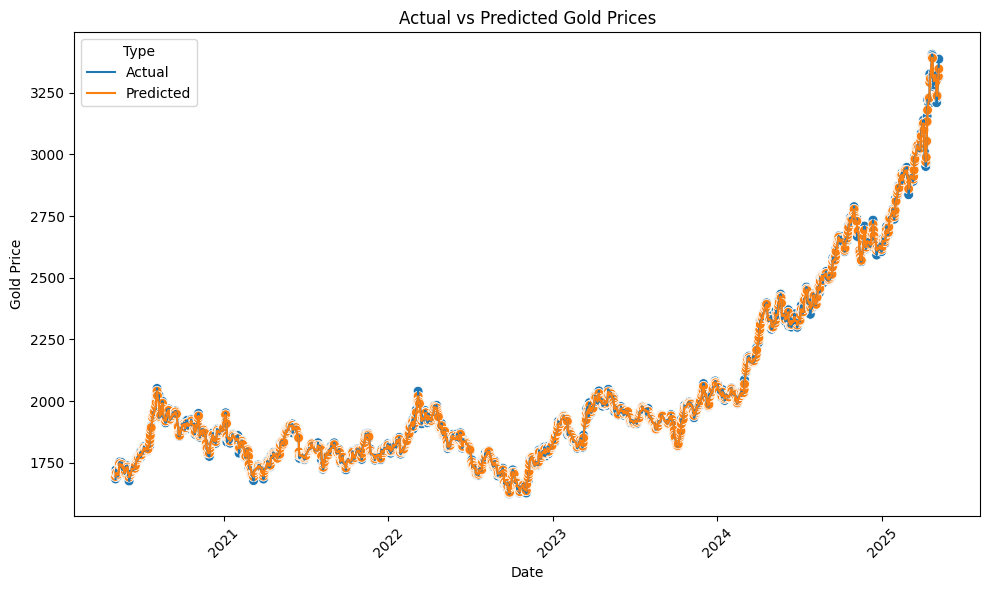

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Actual'] = df['Close']
df['Predicted'] = y_pred

df_long = df.melt(id_vars="Date", value_vars=["Actual", "Predicted"],
                  var_name="Type", value_name="Price")

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_long, x="Date", y="Price", hue="Type", estimator=None)
sns.scatterplot(data=df_long, x="Date", y="Price", hue="Type", legend=False, marker='o', s=50)
plt.title("Actual vs Predicted Gold Prices")
plt.xlabel("Date")
plt.ylabel("Gold Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()